# Basepairing support
In this notebook, I read a single dataset. An array of position pairs is defined (putative basepairing positions) and for each pair, suuport in the data is searched. This is done here by looking at the sum of readnumbers and mean read number of sequences having various dinucleotides at given positions. 

In [1]:
import pandas as pd
import numpy as np
from ivstools import tools
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = '/home/kurfurst/Documents/datasets/MV_aurora_reselection.tsv'
positions = [(43, 79), (44, 78), (45, 77), (46, 76), (47, 75), (48, 74), (49, 72), (50, 71), (51, 70), (56, 64), (57, 63), (58, 62)]

In [3]:
print('Positions to be analysed: ')
print(positions)

Positions to be analysed: 
[(43, 79), (44, 78), (45, 77), (46, 76), (47, 75), (48, 74), (49, 72), (50, 71), (51, 70), (56, 64), (57, 63), (58, 62)]


In [4]:
df = pd.read_csv(dataset, sep='\t', names=['count', 'seq'])
positions0 = [(x[0] - 1, x[1] - 1) for x in positions]

In [5]:
res = []

# For each of the pairs, perform a groupby and add the resulting dataframe into the res list. 
for px in positions0:
    df['px'] = [tools.cutout(s, px) for s in df['seq']]
    gs = df[['count', 'px']].groupby('px', as_index=False).mean()
    colname = '-'.join([str(px[0] + 1), str(px[1] + 1)])
    gs.columns=['px', colname]
    res.append(gs)
    
# Merge all of the elements (dataframes) of the res list on their 'px' column. Use outer merge and fill NA with 0.
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['px'], how='outer'), res).fillna(0)

# Setting the 'px' column as index, rearanging the order of rows (dinucleotides) so that the cannonical basepairs are first
df_merged = df_merged.set_index('px')
df_merged = df_merged.loc[['AT', 'TA', 'CG', 'GC', 'GT', 'TG', 'AA', 'AC', 'AG', 'CA', 'CC', 'CT', 'GA', 'GG', 'TC', 'TT', 'NG']]

# Write the resulting dataframe to a tsv file.
df_merged.to_csv('aurora_reselection_basepairing_positions_avg_rn', sep='\t')

<AxesSubplot:ylabel='px'>

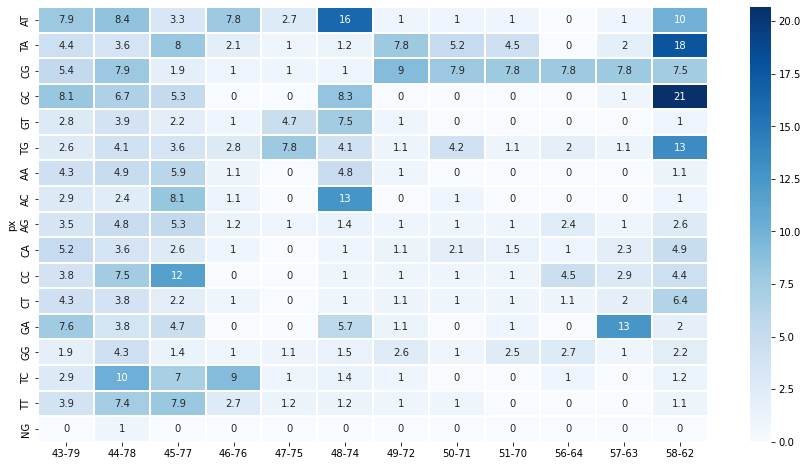

In [6]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_merged, cmap='Blues', annot=True, linewidth=0.2)

---
Next, I do the same thing as above, except this time I'm not computing the mean readnumber but the readnumber sum.

In [7]:
res = []

# For each of the pairs, perform a groupby and add the resulting dataframe into the res list. 
for px in positions0:
    df['px'] = [tools.cutout(s, px) for s in df['seq']]
    gs = df[['count', 'px']].groupby('px', as_index=False).sum()
    colname = '-'.join([str(px[0] + 1), str(px[1] + 1)])
    gs.columns=['px', colname]
    res.append(gs)
    
# Merge all of the elements (dataframes) of the res list on their 'px' column. Use outer merge and fill NA with 0.
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['px'], how='outer'), res).fillna(0)

# Setting the 'px' column as index, rearanging the order of rows (dinucleotides) so that the cannonical basepairs are first
df_merged = df_merged.set_index('px')
df_merged = df_merged.loc[['AT', 'TA', 'CG', 'GC', 'GT', 'TG', 'AA', 'AC', 'AG', 'CA', 'CC', 'CT', 'GA', 'GG', 'TC', 'TT', 'NG']]

# Write the resulting dataframe to a tsv file.
df_merged.to_csv('aurora_reselection_basepairing_positions_sum_rn', sep='\t')

<AxesSubplot:ylabel='px'>

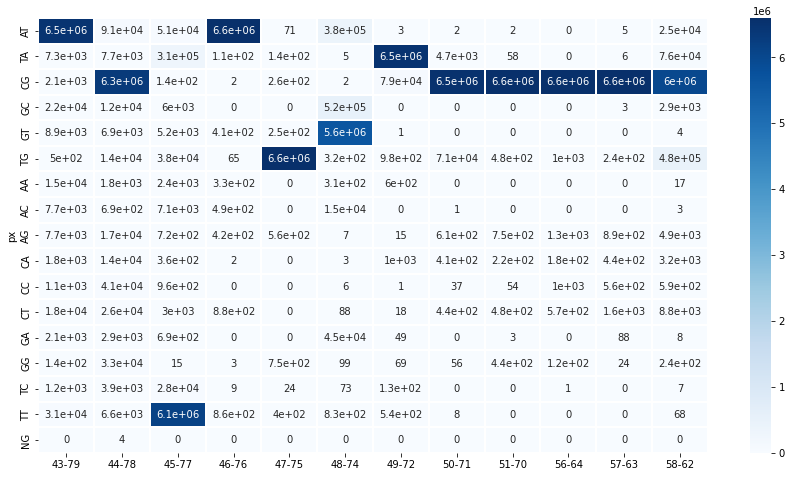

In [8]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_merged, cmap='Blues', annot=True, linewidth=0.2)